### Machine Learning Task: Iris Species Classification
### Goal 
 build a machine learning model that can classify the species of iris flowers based on their features

#### Dataset
➔ You are provided with a dataset in CSV format with the following columns:


   ◆ Sepal_Length: The length of the sepal.
   
   ◆ Sepal_Width: The width of the sepal.
   
   ◆ Petal_Length: The length of the petal.
   
   ◆ Petal_Width: The width of the petal
   
   ◆ Class: The species of the iris (e.g., setosa, versicolor, virginica).


In [30]:
#libarary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the Dataset.
iris = pd.read_csv ('dataset.csv')
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# show data information (such. columns names and data types , number of rows and see if there's null values  ) 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# sum the null values in data 
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

◆ statistics for numerical columns (e.g. std , mean, 
5 number summary (min , q1(median of the first half  ) , q2 (median) , q3(median of the second half ), max  ) 

In [8]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
correlation_features = iris.corr()
correlation_features

C:\Users\zahra\AppData\Local\Temp\ipykernel_1732\1699498694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_features = iris.corr()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

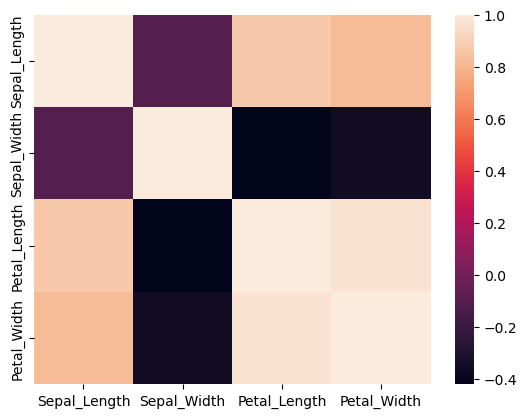

In [32]:
sns.heatmap(correlation_features)

In [10]:
#Checking the iris flowers present (label)
iris['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [17]:
iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
#Checking the detailed statistics for specific iris 
list = [ 'Sepal_Length' , 'Sepal_Width' , 'Petal_Length', 'Petal_Width' ]
list

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [14]:
iris[iris['Class']=="Iris-setosa"][list].describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [15]:
iris[iris['Class']=="Iris-setosa"][list].mean()

Sepal_Length    5.006
Sepal_Width     3.418
Petal_Length    1.464
Petal_Width     0.244
dtype: float64

In [18]:
iris[iris['Class']=="Iris-setosa"][list].max()

Sepal_Length    5.8
Sepal_Width     4.4
Petal_Length    1.9
Petal_Width     0.6
dtype: float64

In [24]:
iris[iris['Class']=="Iris-setosa"][list].min()

Sepal_Length    4.3
Sepal_Width     2.3
Petal_Length    1.0
Petal_Width     0.1
dtype: float64

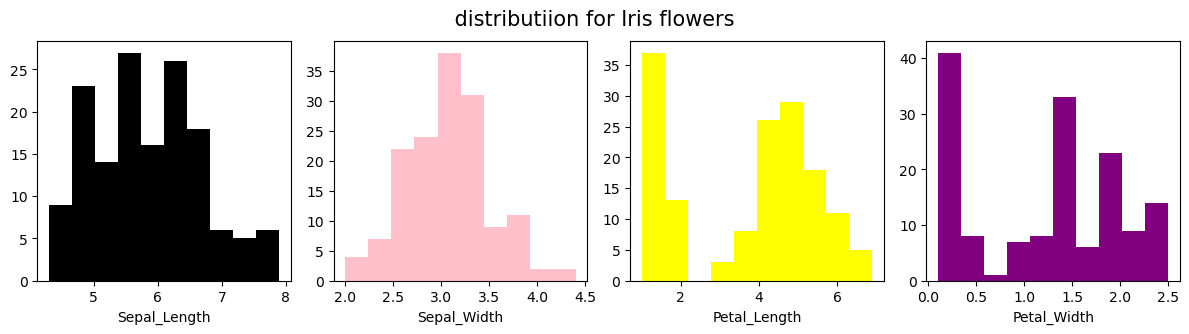

In [23]:
#Checking distributiion for each iris flowers 
figh = plt.figure(figsize= (12,9))

plt.subplot (3,4,1)
plt.hist(iris['Sepal_Length'], color = 'Black')
plt.xlabel('Sepal_Length')

plt.subplot (3,4,2)
plt.hist(iris['Sepal_Width'], color = 'pink')
plt.xlabel('Sepal_Width')

plt.subplot (3,4,3)
plt.hist(iris['Petal_Length'], color = 'yellow')
plt.xlabel('Petal_Length')

plt.subplot (3,4,4)
plt.hist(iris['Petal_Width'], color = 'purple')
plt.xlabel('Petal_Width')


plt.suptitle ( ' distributiion for Iris flowers ' , fontsize = 15)
plt.tight_layout ()
plt.show()

In [33]:
# select features 
labels_to_remove = ['Class']
features = iris.drop(labels=labels_to_remove, axis=1)
features

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Use KMean Cluster model 


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

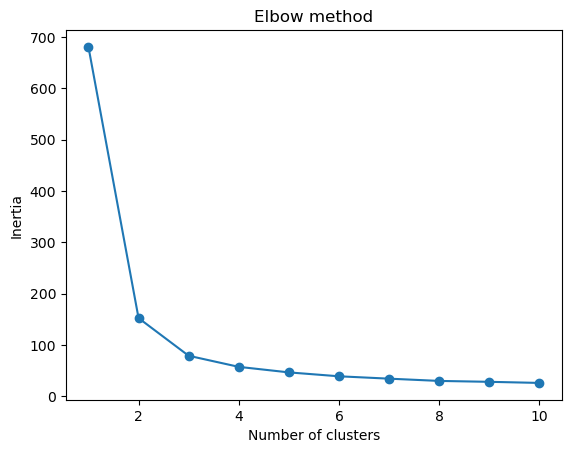

In [34]:
# elbow method to determine the appropriate clusters number 


from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(features)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 3, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(features)

a = iris['Class']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['Class'].unique())
print("...........................................")

print("Crops in second Cluster:", z[z['cluster'] == 1]['Class'].unique())
print("...........................................")

print("Crops in third Cluster:", z[z['cluster'] == 2]['Class'].unique())
print("...........................................")


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['Iris-versicolor' 'Iris-virginica']
...........................................
Crops in second Cluster: ['Iris-setosa']
...........................................
Crops in third Cluster: ['Iris-versicolor' 'Iris-virginica']
...........................................


In [61]:
#Splitting the Dataset for predictive modelling
label = iris['Class']
features = iris.drop(labels = ['Class'] , axis=1)
features

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [63]:
label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [64]:
label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Class
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [65]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( features ,label , test_size = 0.2 , random_state= 0 )

In [74]:
#Creating a Predictive Model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression ()
lr_model.fit (x_train ,y_train  )
print (model.score (x_train ,y_train))

0.9666666666666667


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
y_pred = lr_model.predict (x_test)
print (y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [81]:
# Model Evaluation
# Use the test set to evaluate the model's performance
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


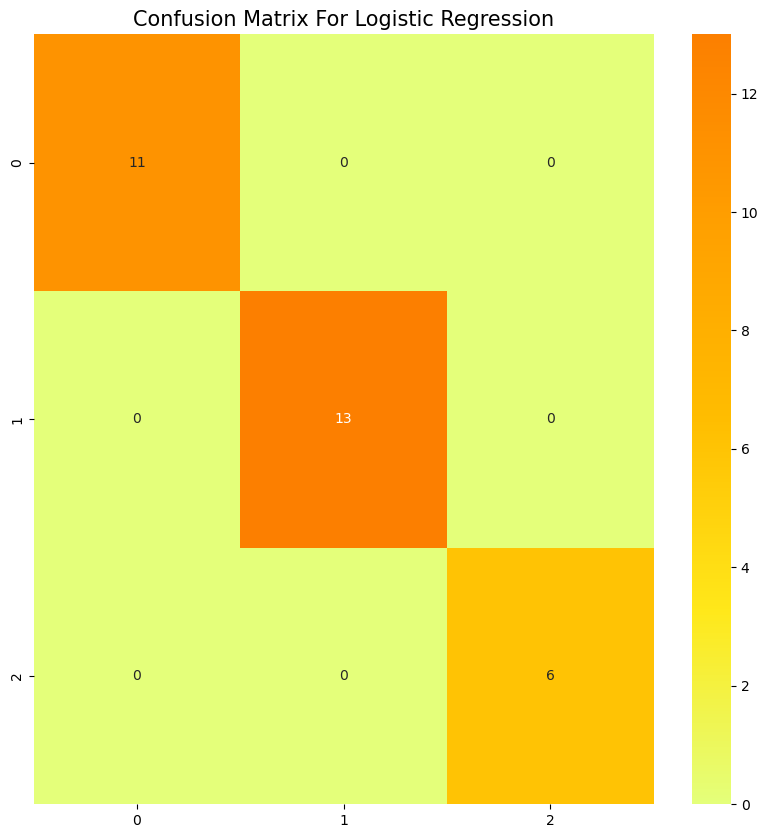

In [92]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [93]:
#Defining the classification Report
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [94]:
# Prediction
# Predict the class of a new iris flower
prediction = lr_model.predict (np.array ([[5.1,3.5,1.4,0.2]]))
print("The Suggested Iris for given features condition is :",prediction)

The Suggested Iris for given features condition is : ['Iris-setosa']


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [95]:
# SVC model 
from sklearn.svm import SVC
sv = SVC ()
sv.fit (x_train ,y_train )
print (sv.score(x_train ,y_train))

0.9583333333333334


In [96]:
y_pred = sv.predict (x_test)
print (y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [102]:
# Model Evaluation
from sklearn.metrics import accuracy_score
y_pred = sv.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [104]:
# Prediction
# Predict the class of a new iris flower
prediction = lr_model.predict (np.array ([[6.3,2.5,5.0,1.9]]))
print("The Suggested Iris for given features condition is :",prediction)

The Suggested Iris for given features condition is : ['Iris-virginica']


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
